In [ ]:
#SVM Classification
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC   #Support Vector Classifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
data=pd.read_csv('/content/sample_data/mushroom.csv')
data

Unnamed: 0 cap_shape cap_surface cap_color bruises     odor  \
0           1167    sunken       scaly     white      no    anise   
1           1037    sunken     fibrous       red      no    anise   
2            309      flat     grooves    purple     yes     foul   
3            282      bell       scaly      pink     yes    fishy   
4            820      flat      smooth    yellow     yes    musty   
...          ...       ...         ...       ...     ...      ...   
1995         863    sunken       scaly     brown     yes     foul   
1996        1160    sunken       scaly    purple     yes    musty   
1997         265    convex     grooves     green     yes    fishy   
1998         411      bell      smooth     white      no  pungent   
1999        1073    convex       scaly    yellow     yes  pungent   

     gill_attachment gill_spacing gill_size gill_color  ...  veil_type  \
0         descending      distant     broad       pink  ...    partial   
1            notched      crowded    narrow  chocolate  ...  universal   
2         descending      crowded     broad     purple  ...  universal   
3            notched        close     broad     orange  ...    partial   
4               free      crowded    narrow     orange  ...  universal   
...              ...          ...       ...        ...  ...        ...   
1995        attached      crowded    narrow  chocolate  ...    partial   
1996        attached      distant    narrow        red  ...    partial   
1997         notched        close    narrow       pink  ...    partial   
1998            free        close    narrow     orange  ...  universal   
1999      descending        close    narrow     purple  ...    partial   

     veil_color ring_number   ring_type spore_print_color population  habitat  \
0         brown         two   sheathing         chocolate  clustered    waste   
1         brown         two   sheathing             brown   numerous    waste   
2        yellow         two   sheathing            purple   abundant    waste   
3        yellow         two    cobwebby             green  clustered  grasses   
4         white        none        none            yellow  clustered    urban   
...         ...         ...         ...               ...        ...      ...   
1995     orange         one     flaring            purple   abundant   leaves   
1996      white         one        zone            yellow   numerous    waste   
1997      brown         two  evanescent            yellow   abundant    woods   
1998     yellow         one    cobwebby             brown   solitary    woods   
1999      white         two       large             white   numerous    urban   

          class stalk_height cap_diameter  
0     poisonous    14.276173     5.054983  
1        edible     3.952715    19.068319  
2     poisonous     9.054265     7.205884  
3     poisonous     5.226499    20.932692  
4     poisonous    14.037532    12.545245  
...         ...          ...          ...  
1995  poisonous     5.877891    17.464145  
1996  poisonous     6.500840    13.501957  
1997  poisonous    13.558064    11.270020  
1998  poisonous    11.092703     8.423199  
1999  poisonous    13.066414    21.056642  

[2000 rows x 26 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [ ]:
data.describe()

Unnamed: 0  stalk_height  cap_diameter
count  2000.000000   2000.000000   2000.000000
mean    624.974000      8.449118     12.314345
std     375.091938      3.697217      7.048845
min       0.000000      2.000000      1.000000
25%     290.000000      5.291009      5.723521
50%     607.000000      8.318596     12.124902
75%     957.250000     11.781272     18.698605
max    1279.000000     15.095066     25.000054

In [ ]:
data .isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [ ]:
data.shape

(2000, 26)

In [ ]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995     True
1996    False
1997     True
1998     True
1999    False
Length: 2000, dtype: bool

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.dropna()

Unnamed: 0 cap_shape cap_surface cap_color bruises     odor  \
0           1167    sunken       scaly     white      no    anise   
1           1037    sunken     fibrous       red      no    anise   
2            309      flat     grooves    purple     yes     foul   
3            282      bell       scaly      pink     yes    fishy   
4            820      flat      smooth    yellow     yes    musty   
...          ...       ...         ...       ...     ...      ...   
1985         877   conical     grooves     brown      no     foul   
1988         926      bell     grooves      pink     yes    anise   
1989         289    sunken      smooth    purple     yes    anise   
1996        1160    sunken       scaly    purple     yes    musty   
1999        1073    convex       scaly    yellow     yes  pungent   

     gill_attachment gill_spacing gill_size gill_color  ...  veil_type  \
0         descending      distant     broad       pink  ...    partial   
1            notched      crowded    narrow  chocolate  ...  universal   
2         descending      crowded     broad     purple  ...  universal   
3            notched        close     broad     orange  ...    partial   
4               free      crowded    narrow     orange  ...  universal   
...              ...          ...       ...        ...  ...        ...   
1985         notched      crowded     broad  chocolate  ...  universal   
1988      descending      distant     broad      brown  ...    partial   
1989      descending      crowded    narrow       buff  ...  universal   
1996        attached      distant    narrow        red  ...    partial   
1999      descending        close    narrow     purple  ...    partial   

     veil_color ring_number  ring_type spore_print_color population  habitat  \
0         brown         two  sheathing         chocolate  clustered    waste   
1         brown         two  sheathing             brown   numerous    waste   
2        yellow         two  sheathing            purple   abundant    waste   
3        yellow         two   cobwebby             green  clustered  grasses   
4         white        none       none            yellow  clustered    urban   
...         ...         ...        ...               ...        ...      ...   
1985      brown        none      large             brown   numerous    paths   
1988      brown         two    pendant            yellow   numerous  grasses   
1989     orange         two       none            orange   abundant  grasses   
1996      white         one       zone            yellow   numerous    waste   
1999      white         two      large             white   numerous    urban   

          class stalk_height cap_diameter  
0     poisonous    14.276173     5.054983  
1        edible     3.952715    19.068319  
2     poisonous     9.054265     7.205884  
3     poisonous     5.226499    20.932692  
4     poisonous    14.037532    12.545245  
...         ...          ...          ...  
1985     edible    13.020616     9.993008  
1988  poisonous     3.751597    18.868135  
1989     edible    13.134058    15.740028  
1996  poisonous     6.500840    13.501957  
1999  poisonous    13.066414    21.056642  

[976 rows x 26 columns]

In [ ]:
data

Unnamed: 0 cap_shape cap_surface cap_color bruises     odor  \
0           1167    sunken       scaly     white      no    anise   
1           1037    sunken     fibrous       red      no    anise   
2            309      flat     grooves    purple     yes     foul   
3            282      bell       scaly      pink     yes    fishy   
4            820      flat      smooth    yellow     yes    musty   
...          ...       ...         ...       ...     ...      ...   
1985         877   conical     grooves     brown      no     foul   
1988         926      bell     grooves      pink     yes    anise   
1989         289    sunken      smooth    purple     yes    anise   
1996        1160    sunken       scaly    purple     yes    musty   
1999        1073    convex       scaly    yellow     yes  pungent   

     gill_attachment gill_spacing gill_size gill_color  ...  veil_type  \
0         descending      distant     broad       pink  ...    partial   
1            notched      crowded    narrow  chocolate  ...  universal   
2         descending      crowded     broad     purple  ...  universal   
3            notched        close     broad     orange  ...    partial   
4               free      crowded    narrow     orange  ...  universal   
...              ...          ...       ...        ...  ...        ...   
1985         notched      crowded     broad  chocolate  ...  universal   
1988      descending      distant     broad      brown  ...    partial   
1989      descending      crowded    narrow       buff  ...  universal   
1996        attached      distant    narrow        red  ...    partial   
1999      descending        close    narrow     purple  ...    partial   

     veil_color ring_number  ring_type spore_print_color population  habitat  \
0         brown         two  sheathing         chocolate  clustered    waste   
1         brown         two  sheathing             brown   numerous    waste   
2        yellow         two  sheathing            purple   abundant    waste   
3        yellow         two   cobwebby             green  clustered  grasses   
4         white        none       none            yellow  clustered    urban   
...         ...         ...        ...               ...        ...      ...   
1985      brown        none      large             brown   numerous    paths   
1988      brown         two    pendant            yellow   numerous  grasses   
1989     orange         two       none            orange   abundant  grasses   
1996      white         one       zone            yellow   numerous    waste   
1999      white         two      large             white   numerous    urban   

          class stalk_height cap_diameter  
0     poisonous    14.276173     5.054983  
1        edible     3.952715    19.068319  
2     poisonous     9.054265     7.205884  
3     poisonous     5.226499    20.932692  
4     poisonous    14.037532    12.545245  
...         ...          ...          ...  
1985     edible    13.020616     9.993008  
1988  poisonous     3.751597    18.868135  
1989     edible    13.134058    15.740028  
1996  poisonous     6.500840    13.501957  
1999  poisonous    13.066414    21.056642  

[976 rows x 26 columns]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for column in data.columns:
  if data[column].dtype==object:
    le=LabelEncoder()
    data[column]=le.fit_transform(data[column])
data

Unnamed: 0  cap_shape  cap_surface  cap_color  bruises  odor  \
0           1167          4            2          7        0     1   
1           1037          4            0          6        0     1   
2            309          3            1          5        1     4   
3            282          0            2          4        1     3   
4            820          3            3          8        1     5   
...          ...        ...          ...        ...      ...   ...   
1985         877          1            1          0        0     4   
1988         926          0            1          4        1     1   
1989         289          4            3          5        1     1   
1996        1160          4            2          5        1     5   
1999        1073          2            2          8        1     7   

      gill_attachment  gill_spacing  gill_size  gill_color  ...  veil_type  \
0                   1             2          0           7  ...          0   
1                   3             1          1           3  ...          1   
2                   1             1          0           8  ...          1   
3                   3             0          0           6  ...          0   
4                   2             1          1           6  ...          1   
...               ...           ...        ...         ...  ...        ...   
1985                3             1          0           3  ...          1   
1988                1             2          0           1  ...          0   
1989                1             1          1           2  ...          1   
1996                0             2          1           9  ...          0   
1999                1             0          1           8  ...          0   

      veil_color  ring_number  ring_type  spore_print_color  population  \
0              0            2          6                  3           1   
1              0            2          6                  1           2   
2              3            2          6                  6           0   
3              3            2          0                  4           1   
4              2            0          4                  8           1   
...          ...          ...        ...                ...         ...   
1985           0            0          3                  1           2   
1988           0            2          5                  8           2   
1989           1            2          4                  5           0   
1996           2            1          7                  8           2   
1999           2            2          3                  7           2   

      habitat  class  stalk_height  cap_diameter  
0           5      1     14.276173      5.054983  
1           5      0      3.952715     19.068319  
2           5      1      9.054265      7.205884  
3           0      1      5.226499     20.932692  
4           4      1     14.037532     12.545245  
...       ...    ...           ...           ...  
1985        3      0     13.020616      9.993008  
1988        0      1      3.751597     18.868135  
1989        0      0     13.134058     15.740028  
1996        5      1      6.500840     13.501957  
1999        4      1     13.066414     21.056642  

[976 rows x 26 columns]

In [ ]:
data.corr()

Unnamed: 0  cap_shape  cap_surface  cap_color  \
Unnamed: 0                  1.000000  -0.002662    -0.025126   0.040939   
cap_shape                  -0.002662   1.000000     0.024645   0.020694   
cap_surface                -0.025126   0.024645     1.000000   0.010129   
cap_color                   0.040939   0.020694     0.010129   1.000000   
bruises                    -0.019980  -0.007043    -0.013355   0.007862   
odor                       -0.018715  -0.035072    -0.001229  -0.056524   
gill_attachment            -0.016446   0.017091    -0.008412   0.000201   
gill_spacing                0.043219  -0.026279     0.033273   0.001367   
gill_size                   0.025476   0.017675    -0.046493   0.034965   
gill_color                  0.018908   0.050239     0.033423   0.005884   
stalk_shape                -0.032525  -0.013837    -0.012625  -0.015452   
stalk_root                  0.030277   0.052715    -0.021370   0.006823   
stalk_surface_above_ring   -0.044551  -0.048211     0.034439  -0.038396   
stalk_surface_below_ring   -0.071486   0.006413    -0.011787   0.004605   
stalk_color_above_ring      0.003525  -0.038000    -0.051801  -0.003503   
stalk_color_below_ring     -0.006987  -0.018025    -0.003789  -0.007788   
veil_type                   0.032241  -0.015447    -0.042954  -0.008664   
veil_color                  0.003575  -0.004381     0.027026  -0.027817   
ring_number                -0.068662   0.038398     0.005017   0.037536   
ring_type                  -0.000326   0.012335     0.002838   0.023527   
spore_print_color          -0.004192   0.008641    -0.057301   0.045805   
population                  0.007227   0.009890    -0.026943  -0.039548   
habitat                     0.033891  -0.003017    -0.038786  -0.006857   
class                       0.021431   0.008132    -0.047799  -0.048735   
stalk_height                0.000815  -0.019087     0.026016   0.026948   
cap_diameter                0.042726   0.015284     0.030579   0.006289   

                           bruises      odor  gill_attachment  gill_spacing  \
Unnamed: 0               -0.019980 -0.018715        -0.016446      0.043219   
cap_shape                -0.007043 -0.035072         0.017091     -0.026279   
cap_surface              -0.013355 -0.001229        -0.008412      0.033273   
cap_color                 0.007862 -0.056524         0.000201      0.001367   
bruises                   1.000000  0.051111         0.006422     -0.017566   
odor                      0.051111  1.000000        -0.013212     -0.030698   
gill_attachment           0.006422 -0.013212         1.000000     -0.024634   
gill_spacing             -0.017566 -0.030698        -0.024634      1.000000   
gill_size                -0.004689 -0.057671        -0.011606      0.012648   
gill_color               -0.033166 -0.030782         0.026293     -0.004135   
stalk_shape               0.035013 -0.003433        -0.021527      0.060430   
stalk_root               -0.000106 -0.001555        -0.018382     -0.003949   
stalk_surface_above_ring -0.041081  0.048396        -0.000495     -0.019223   
stalk_surface_below_ring -0.002800 -0.025388        -0.011155     -0.038614   
stalk_color_above_ring    0.013911  0.003075        -0.015330     -0.001535   
stalk_color_below_ring   -0.088043  0.014668         0.026026     -0.002366   
veil_type                 0.007497  0.022875        -0.044643     -0.027653   
veil_color               -0.023444  0.033718        -0.005227     -0.003433   
ring_number              -0.037722 -0.031397         0.048239      0.009182   
ring_type                -0.067596  0.005064        -0.049124      0.008323   
spore_print_color        -0.028591 -0.078276        -0.020564      0.023472   
population                0.014990 -0.000816         0.003722      0.005042   
habitat                   0.011681 -0.021675        -0.020783      0.024691   
class                    -0.007932  0.009625        -0.023758      0.045121   
stalk_height             

<Axes: >

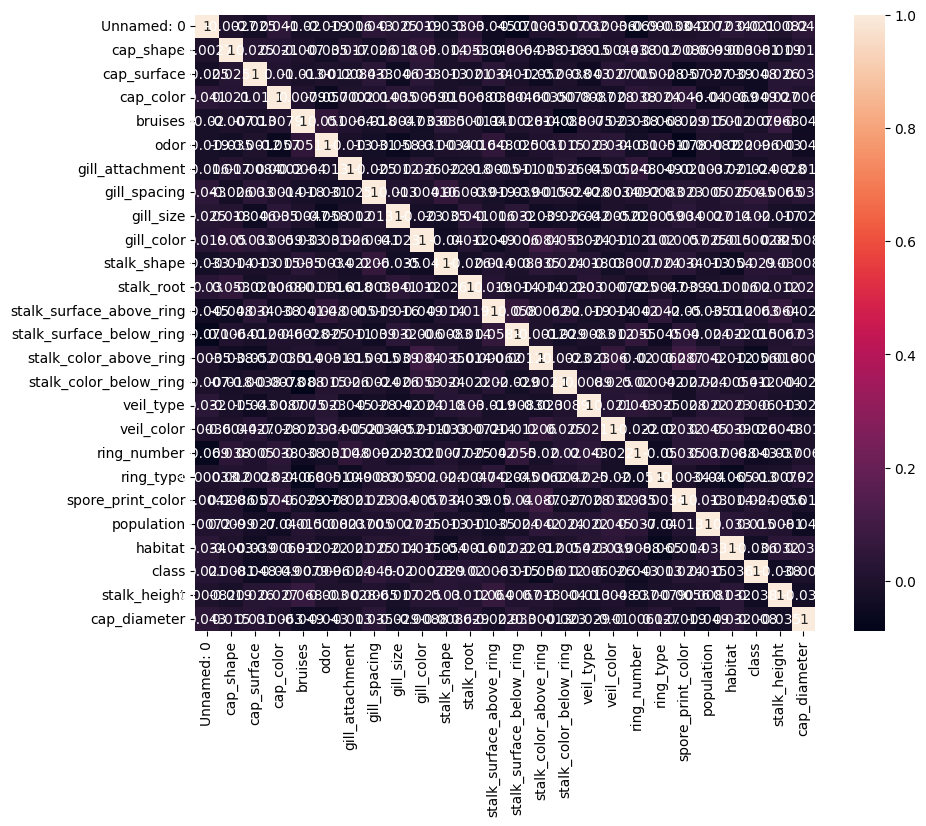

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)

<function matplotlib.pyplot.show(close=None, block=None)>

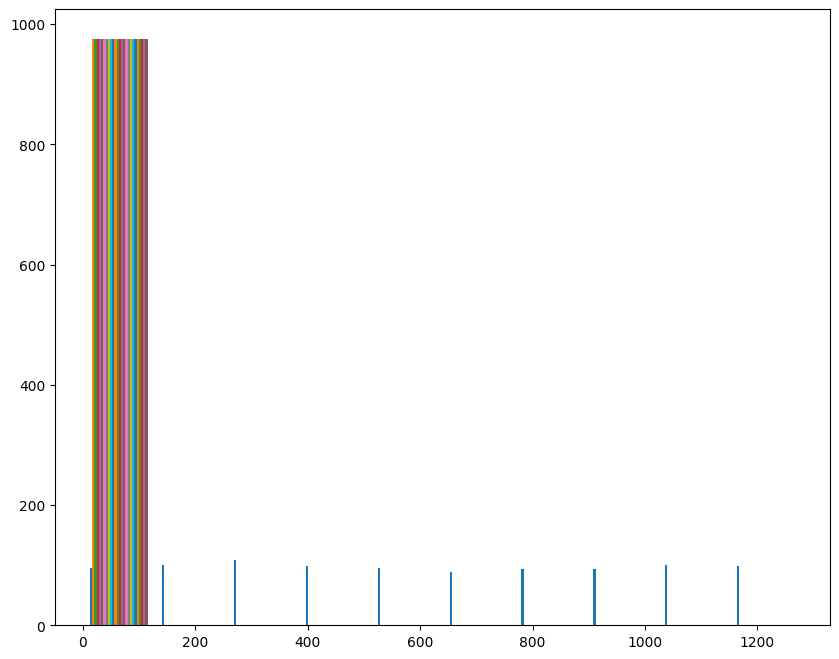

In [ ]:
plt.figure(figsize=(10,8))
plt.hist(data)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

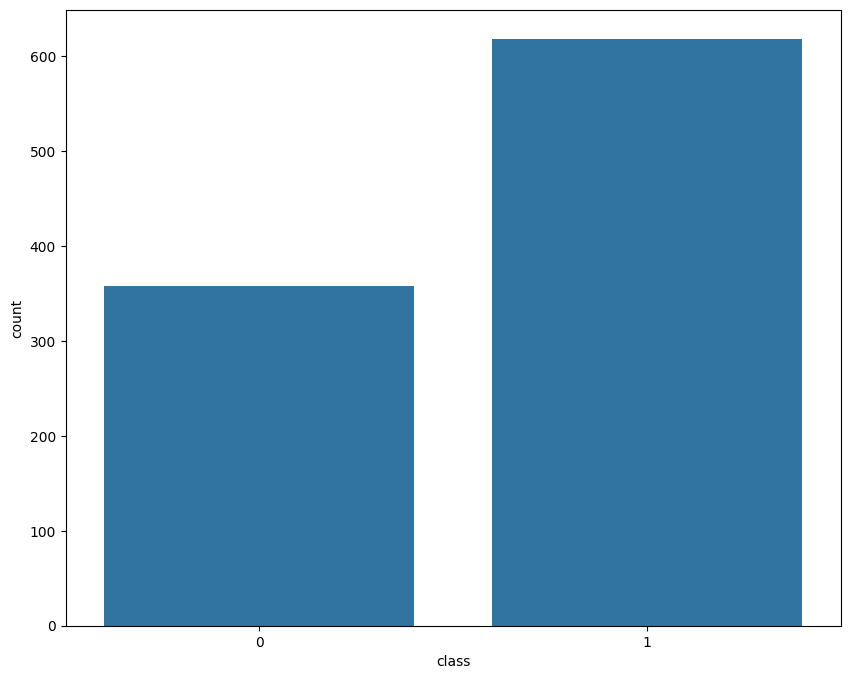

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='class',data=data)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

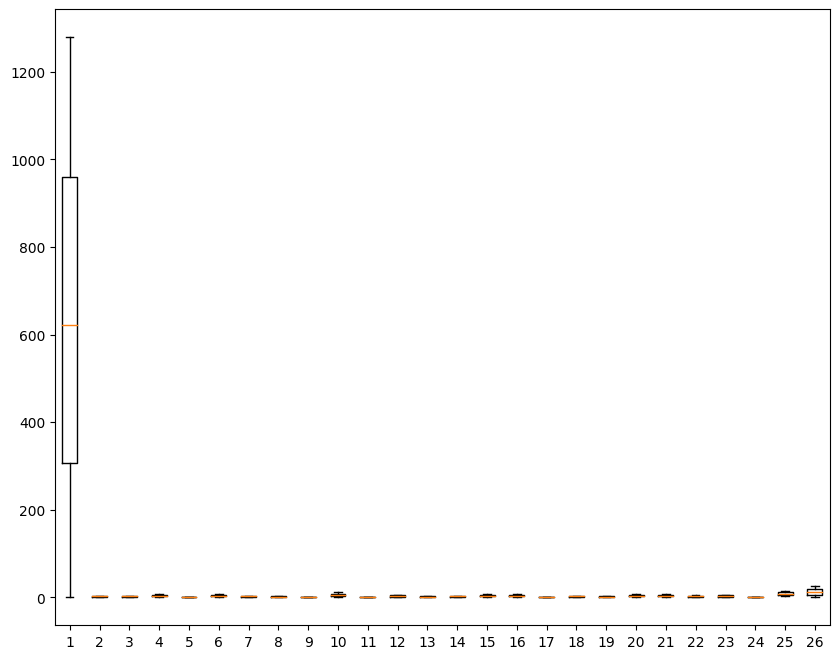

In [ ]:
plt.figure(figsize=(10,8))
plt.boxplot(data)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x800 with 0 Axes>

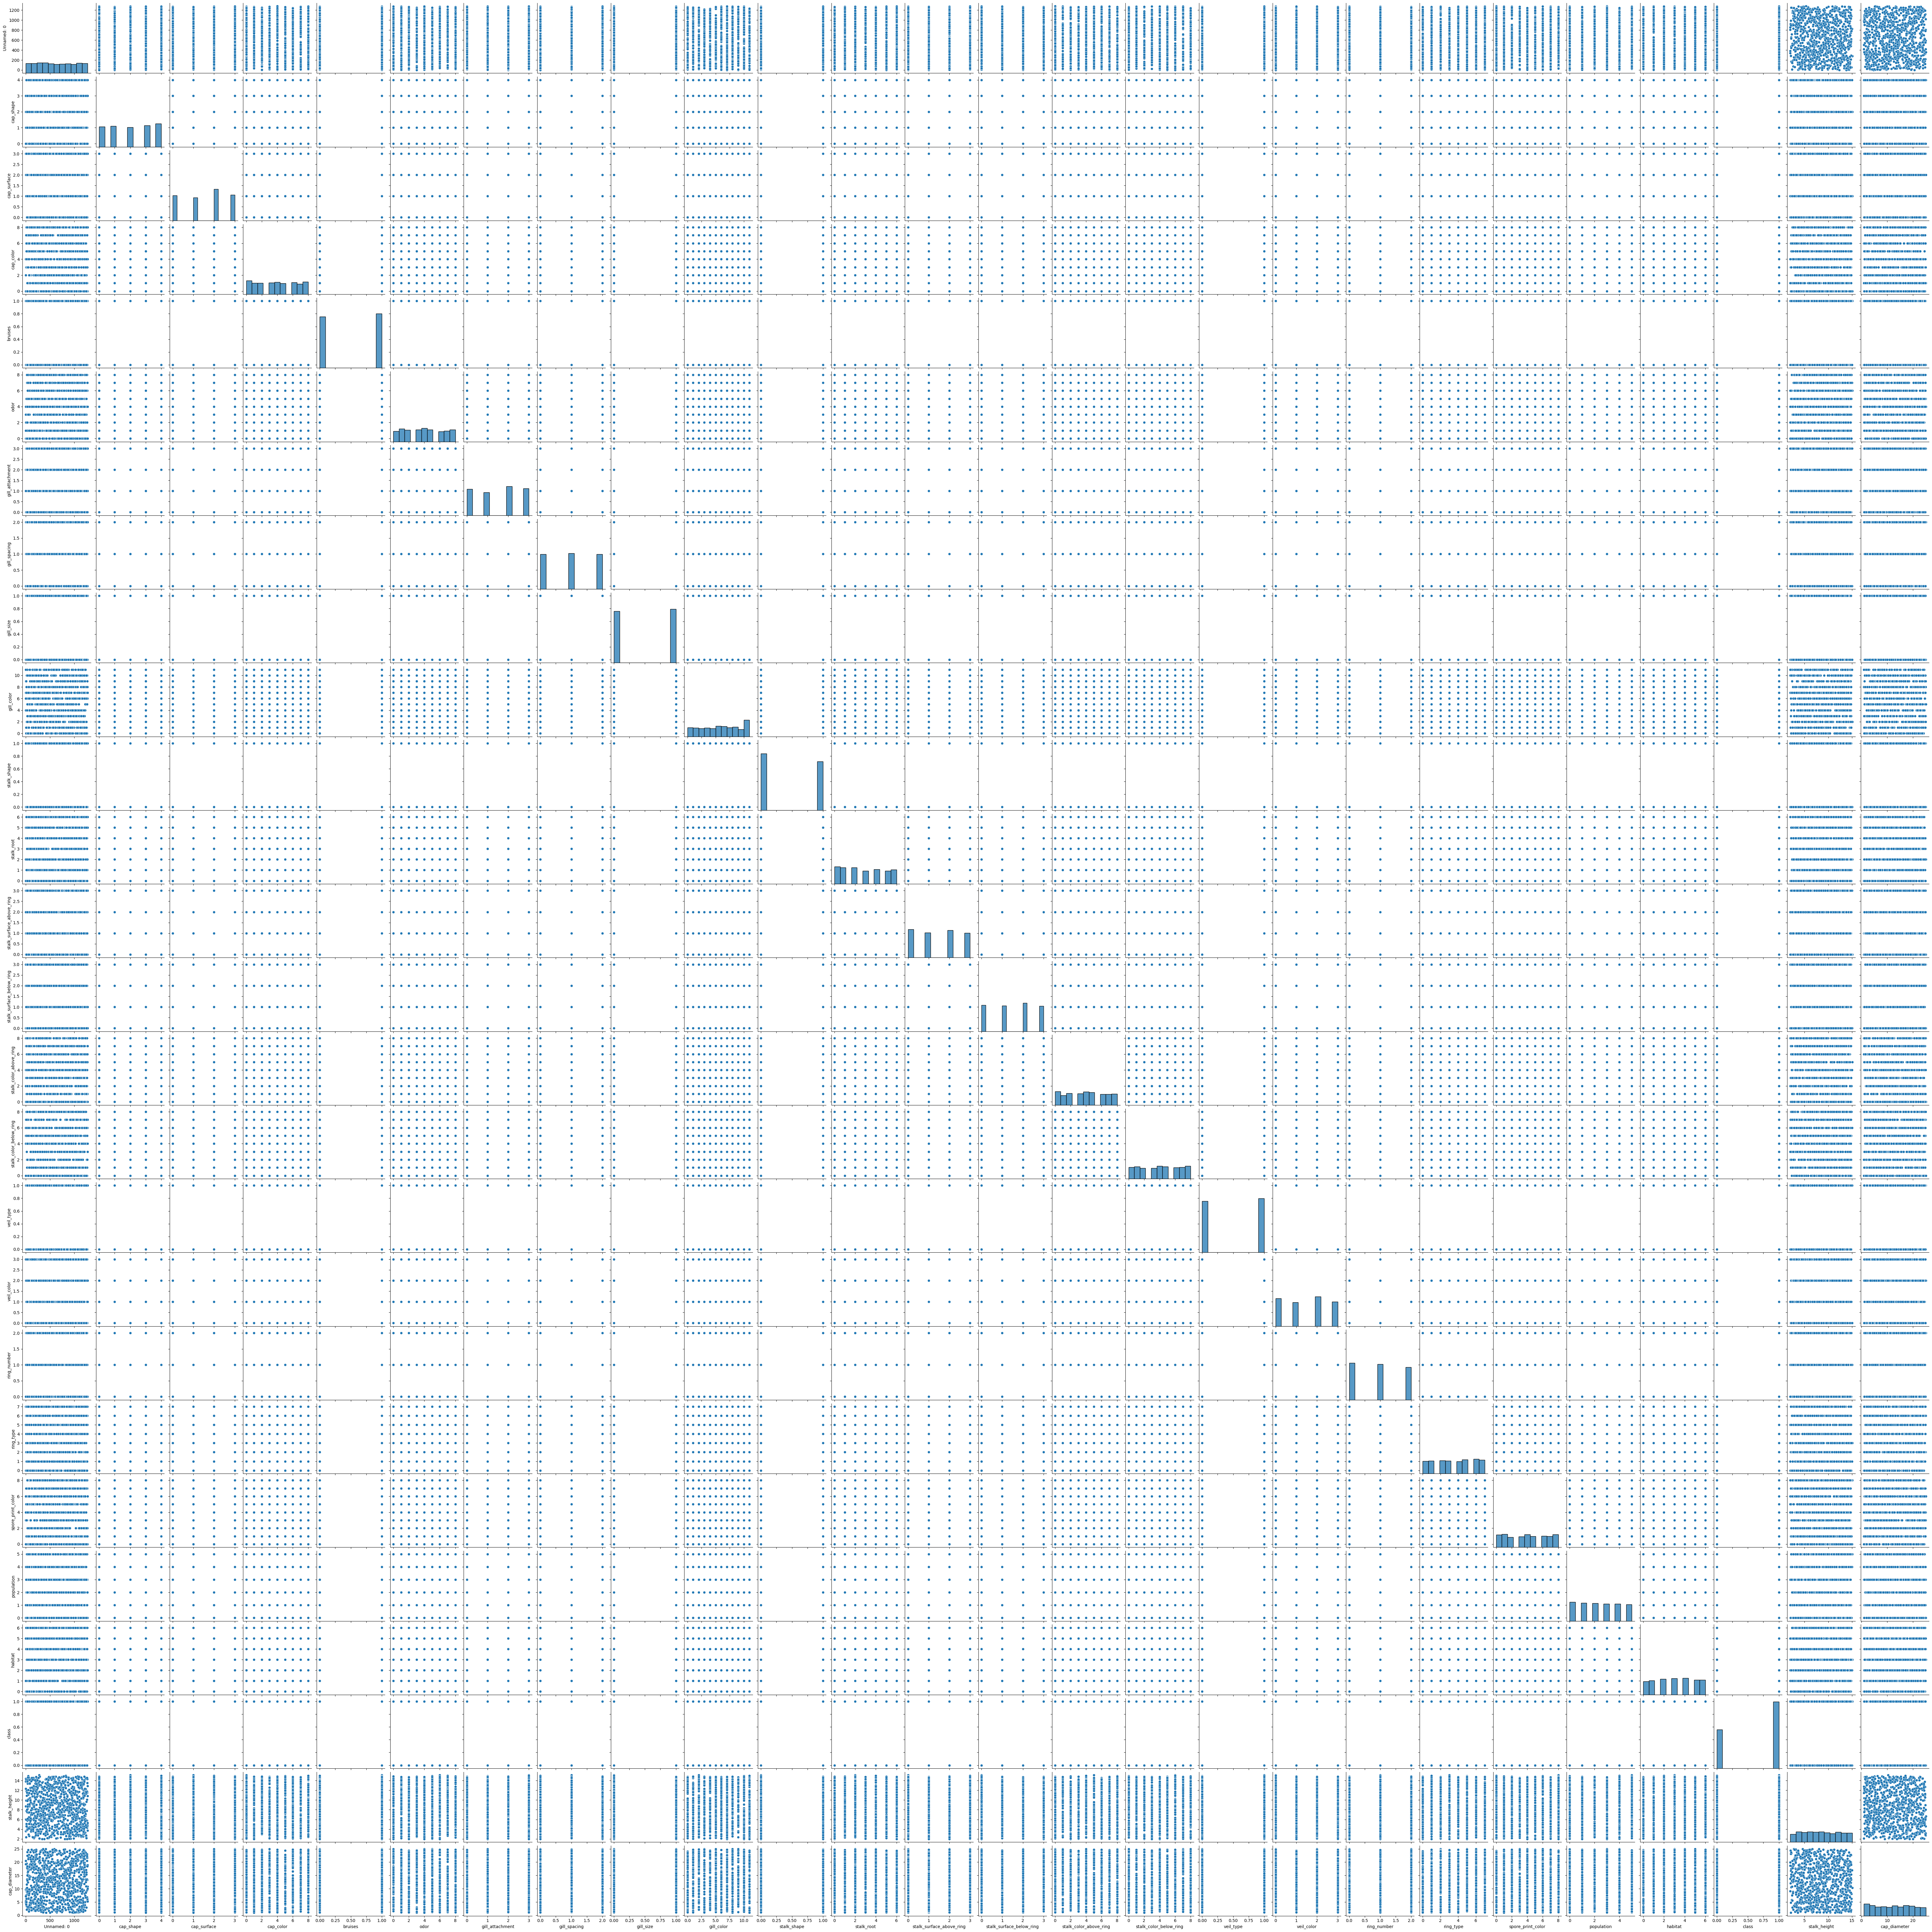

In [ ]:
plt.figure(figsize=(10,8))
sns.pairplot(data)
plt.show

In [ ]:
# Convert all float values to integers
data = data.applymap(lambda x: int(round(x)) if isinstance(x, float) else x)
data

Unnamed: 0  cap_shape  cap_surface  cap_color  bruises  odor  \
0           1167          4            2          7        0     1   
1           1037          4            0          6        0     1   
2            309          3            1          5        1     4   
3            282          0            2          4        1     3   
4            820          3            3          8        1     5   
...          ...        ...          ...        ...      ...   ...   
1985         877          1            1          0        0     4   
1988         926          0            1          4        1     1   
1989         289          4            3          5        1     1   
1996        1160          4            2          5        1     5   
1999        1073          2            2          8        1     7   

      gill_attachment  gill_spacing  gill_size  gill_color  ...  veil_type  \
0                   1             2          0           7  ...          0   
1                   3             1          1           3  ...          1   
2                   1             1          0           8  ...          1   
3                   3             0          0           6  ...          0   
4                   2             1          1           6  ...          1   
...               ...           ...        ...         ...  ...        ...   
1985                3             1          0           3  ...          1   
1988                1             2          0           1  ...          0   
1989                1             1          1           2  ...          1   
1996                0             2          1           9  ...          0   
1999                1             0          1           8  ...          0   

      veil_color  ring_number  ring_type  spore_print_color  population  \
0              0            2          6                  3           1   
1              0            2          6                  1           2   
2              3            2          6                  6           0   
3              3            2          0                  4           1   
4              2            0          4                  8           1   
...          ...          ...        ...                ...         ...   
1985           0            0          3                  1           2   
1988           0            2          5                  8           2   
1989           1            2          4                  5           0   
1996           2            1          7                  8           2   
1999           2            2          3                  7           2   

      habitat  class  stalk_height  cap_diameter  
0           5      1            14             5  
1           5      0             4            19  
2           5      1             9             7  
3           0      1             5            21  
4           4      1            14            13  
...       ...    ...           ...           ...  
1985        3      0            13            10  
1988        0      1             4            19  
1989        0      0            13            16  
1996        5      1             7            14  
1999        4      1            13            21  

[976 rows x 26 columns]

In [ ]:
#spliting the data
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
x,y

(      Unnamed: 0  cap_shape  cap_surface  cap_color  bruises  odor  \
 0           1167          4            2          7        0     1   
 1           1037          4            0          6        0     1   
 2            309          3            1          5        1     4   
 3            282          0            2          4        1     3   
 4            820          3            3          8        1     5   
 ...          ...        ...          ...        ...      ...   ...   
 1985         877          1            1          0        0     4   
 1988         926          0            1          4        1     1   
 1989         289          4            3          5        1     1   
 1996        1160          4            2          5        1     5   
 1999        1073          2            2          8        1     7   
 
       gill_attachment  gill_spacing  gill_size  gill_color  ...  \
 0                   1             2          0           7  ...   
 1        

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)
x_train,y_train

(      Unnamed: 0  cap_shape  cap_surface  cap_color  bruises  odor  \
 990          567          2            0          0        0     0   
 899          104          4            2          5        1     5   
 33           699          1            0          4        0     2   
 31           277          2            0          6        1     7   
 1591         940          3            3          7        0     3   
 ...          ...        ...          ...        ...      ...   ...   
 110          602          2            2          3        0     8   
 301          134          1            0          0        1     6   
 1512         276          3            1          8        0     1   
 536           51          2            3          4        1     0   
 105         1147          4            3          1        0     4   
 
       gill_attachment  gill_spacing  gill_size  gill_color  ...  \
 990                 3             1          0          10  ...   
 899      

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(780, 25)
(196, 25)
(780,)
(196,)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train,x_test

(array([[-0.17799506, -0.0286743 , -1.4104593 , ..., -0.52912275,
         -1.31425748, -0.41649297],
        [-1.41798608,  1.36919761,  0.3960403 , ..., -0.01451459,
         -1.31425748,  0.92925896],
        [ 0.1755229 , -0.72761025, -1.4104593 , ...,  0.50009358,
          0.76088591,  0.39095819],
        ...,
        [-0.95734146,  0.67026166, -0.5072095 , ..., -0.52912275,
         -1.31425748, -1.22394413],
        [-1.55992889, -0.0286743 ,  1.29929009, ...,  0.50009358,
          0.76088591, -0.41649297],
        [ 1.37534143,  1.36919761,  1.29929009, ...,  1.5293099 ,
          0.76088591,  0.1218078 ]]),
 array([[ 1.43961742, -1.42654621,  1.29929009, ..., -1.04373092,
          0.76088591, -1.22394413],
        [-0.05212124,  0.67026166, -1.4104593 , ...,  1.5293099 ,
          0.76088591, -0.68564335],
        [-0.45652436, -0.0286743 ,  1.29929009, ...,  0.50009358,
          0.76088591, -1.7622449 ],
        ...,
        [-0.36011037,  1.36919761, -1.4104593 , ..., -

In [ ]:
gsv.best_params_ , gsv.best_score_

({'C': 8, 'gamma': 0.001, 'kernel': 'sigmoid'}, 0.0665895224069009)

In [ ]:
from sklearn import svm
svm_model=svm.SVC(kernel='sigmoid')

In [ ]:
svm_model.fit(x_train,y_train)

In [ ]:
clf = SVC(kernel='linear',C= 8, gamma = 0.0001)
clf.fit(x_test , y_test)
y_pred_test= clf.predict(x_test)
acc = accuracy_score(y_test, y_pred_test) * 100
print("Accuracy =", acc)
print(confusion_matrix(y_test, y_pred_test))

ValueError: could not convert string to float: 'sunken'

In [ ]:
clf = SVC(kernel='linear',C= 8, gamma = 0.0001)
clf.fit(x_train , y_train)
y_pred_train= clf.predict(x_test)
acc = accuracy_score(y_train, y_pred_train) * 100
print("Accuracy =", acc)
print(confusion_matrix(y_train, y_pred_train))

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Experiment with different SVM hyperparameters
# Example: Experimenting with different kernel types
from sklearn.svm import SVC
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    svm_model = SVC(kernel=kernel)
    svm_model.fit(x_train, y_train)
    y_pred = svm_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Kernel:", kernel)
    print("Accuracy:", accuracy)
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))